# Logistic, Poisson, Multinomial, and Ordinal Regression


Notebook created for Regression in Psychology [PSYCH–GA.2229](https://docs.google.com/document/d/10AW7g92O6BtX61kXVIkHtL4j_k3P_G5f/edit?usp=sharing&ouid=100340169590558171318&rtpof=true&sd=true) graduate level course at New York University by [Dr. Madalina Vlasceanu](https://www.mvlasceanu.com/)

This content is Open Access (free access to information and unrestricted use of electronic resources for everyone).

Sources:
- Navarro, D. (2013). Learning statistics with R: https://learningstatisticswithr.com/
- Gureckis, 2018
https://teaching.gureckislab.org/fall22/labincp/intro.html

## 1. Logistic Regression

- Logistic Regression is a generalized linear model.
- It is also called a logit model.
- It is used when the DV is binary or categorical (examples: voting, correct responses, threshold based outcomes).

$$y \sim \text{Bernoulli}(p)$$

$$\log\left(\frac{p}{1-p}\right) = \beta_0+\beta_1 x$$

$$ p = \frac{1}{1+\exp(-(\beta_0+\beta_1 x))} $$



- The ln(odds)= ω is called a logit.
- A regression model with ω as the outcome is called logistic regression
ω = B0 + B1X
- The parameters of logistic regression have a natural interpretation when their antilog (exp) is taken
- The constant B0 is simply the odds of the outcome when X=0
- The slope B1 is an odds ratio

What is wrong with running regular ols regression on binary outcome data?

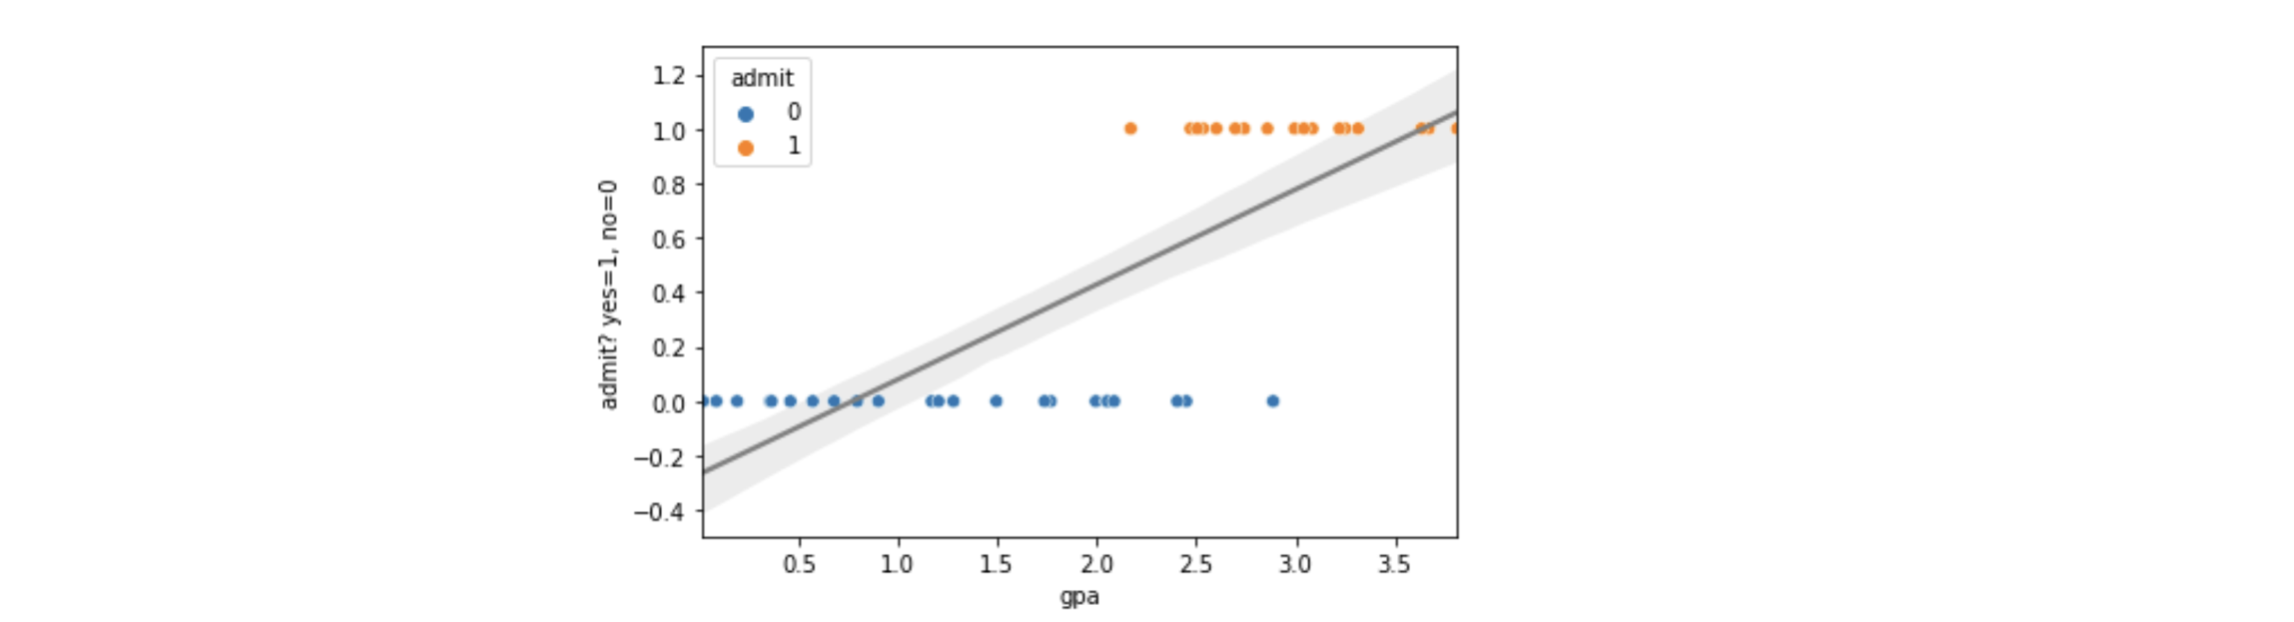

The homogeneity of variance assumption of linear regression (OLS) is violated: Here the errors are not random and the same size for all values of x. Instead some errors are way larger than others:

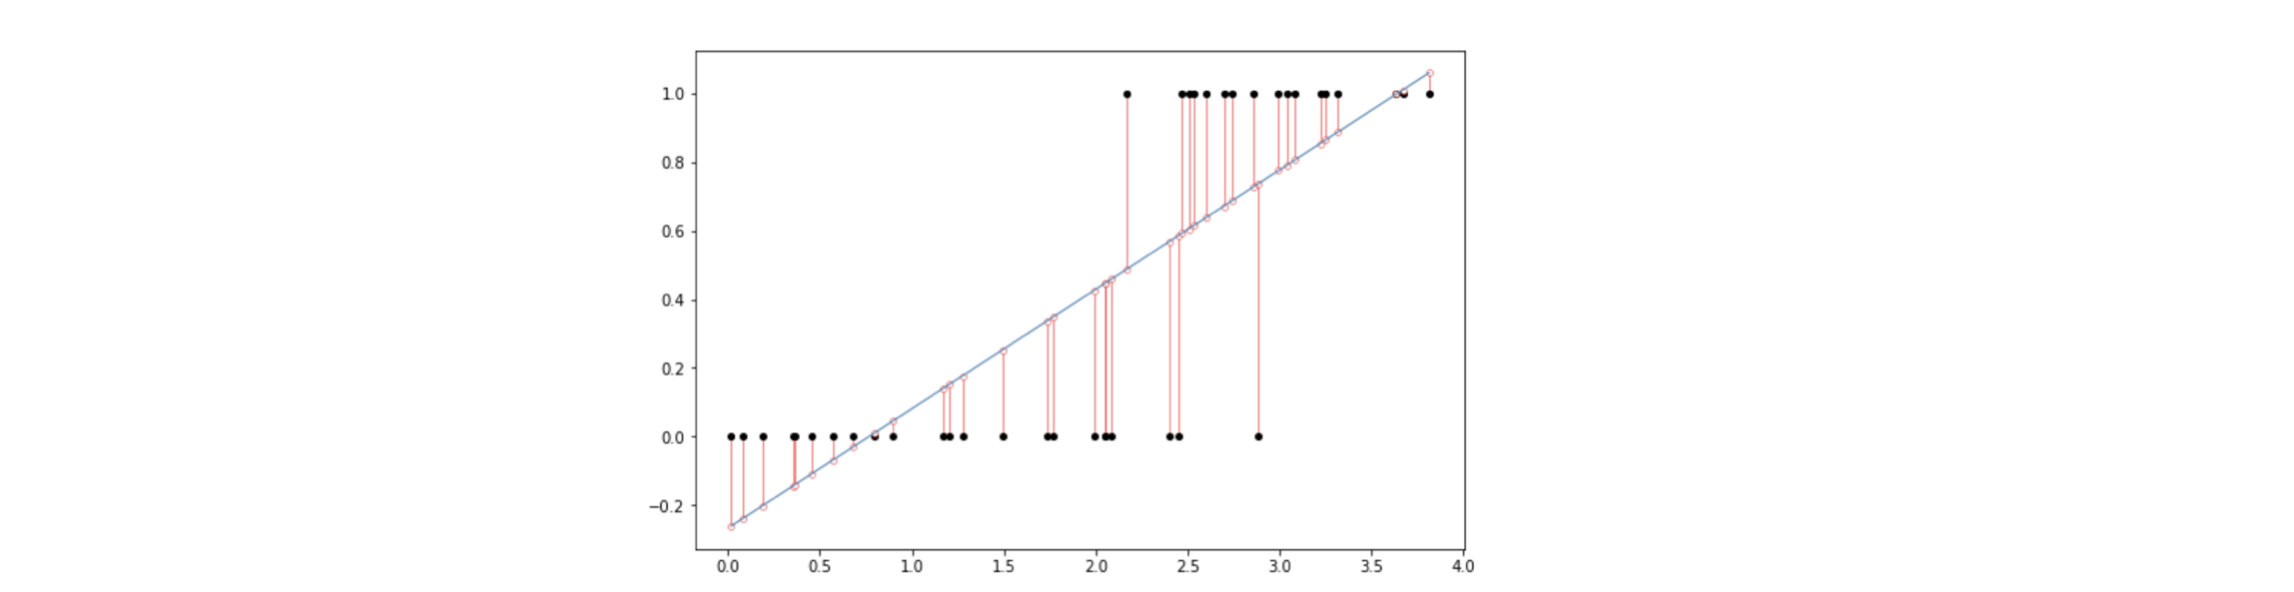

The solution is to transform the dichotomous outcome into probabilities of each of the 2 outcomes.

Example: use GPA to predict being admitted to NYU (1) or not being admitted to NYU (0). This dichotomous outcome can also be thought of as the probability (likelihood) of being admitted to NYU.

This can be achieved with the logit model.
- One way to model the relationship between a continuous predictor variable 𝑋 and a probability 𝜋 is with the logistic response function, also known as a sigmoid or s-shaped curve
- the logit is a function that maps the real number line to a range bounded by 0 and 1.
- So the logit function takes as input any number on the real number line and converts it to a number between 0.0 and 1.0 which is handy if you want to predict probabilities

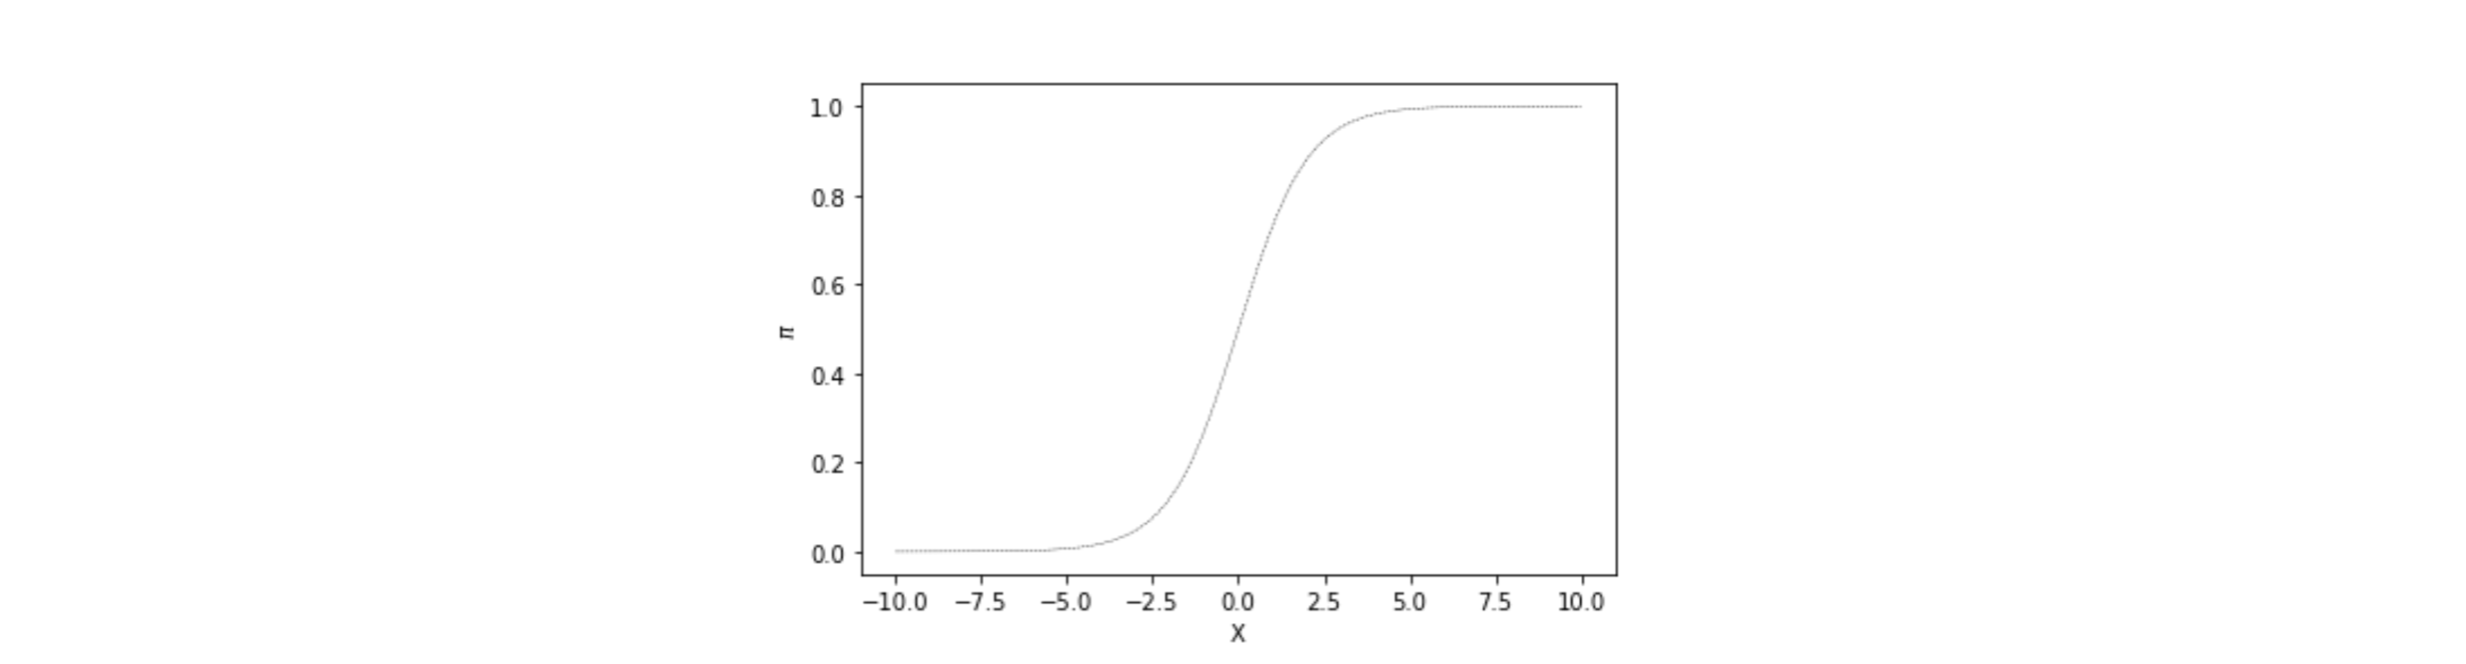

Example: use GPA to predict admission outcomes:
- Instead of fitting the line in the space of 𝑝(𝑎𝑑𝑚𝑖𝑡𝑡𝑒𝑑)
- We will be fitting the log odds of being admitted (i.e., 𝑙𝑜𝑔(𝑝/1−𝑝)
- Instead of computing residuals, we will project the data onto log odds line

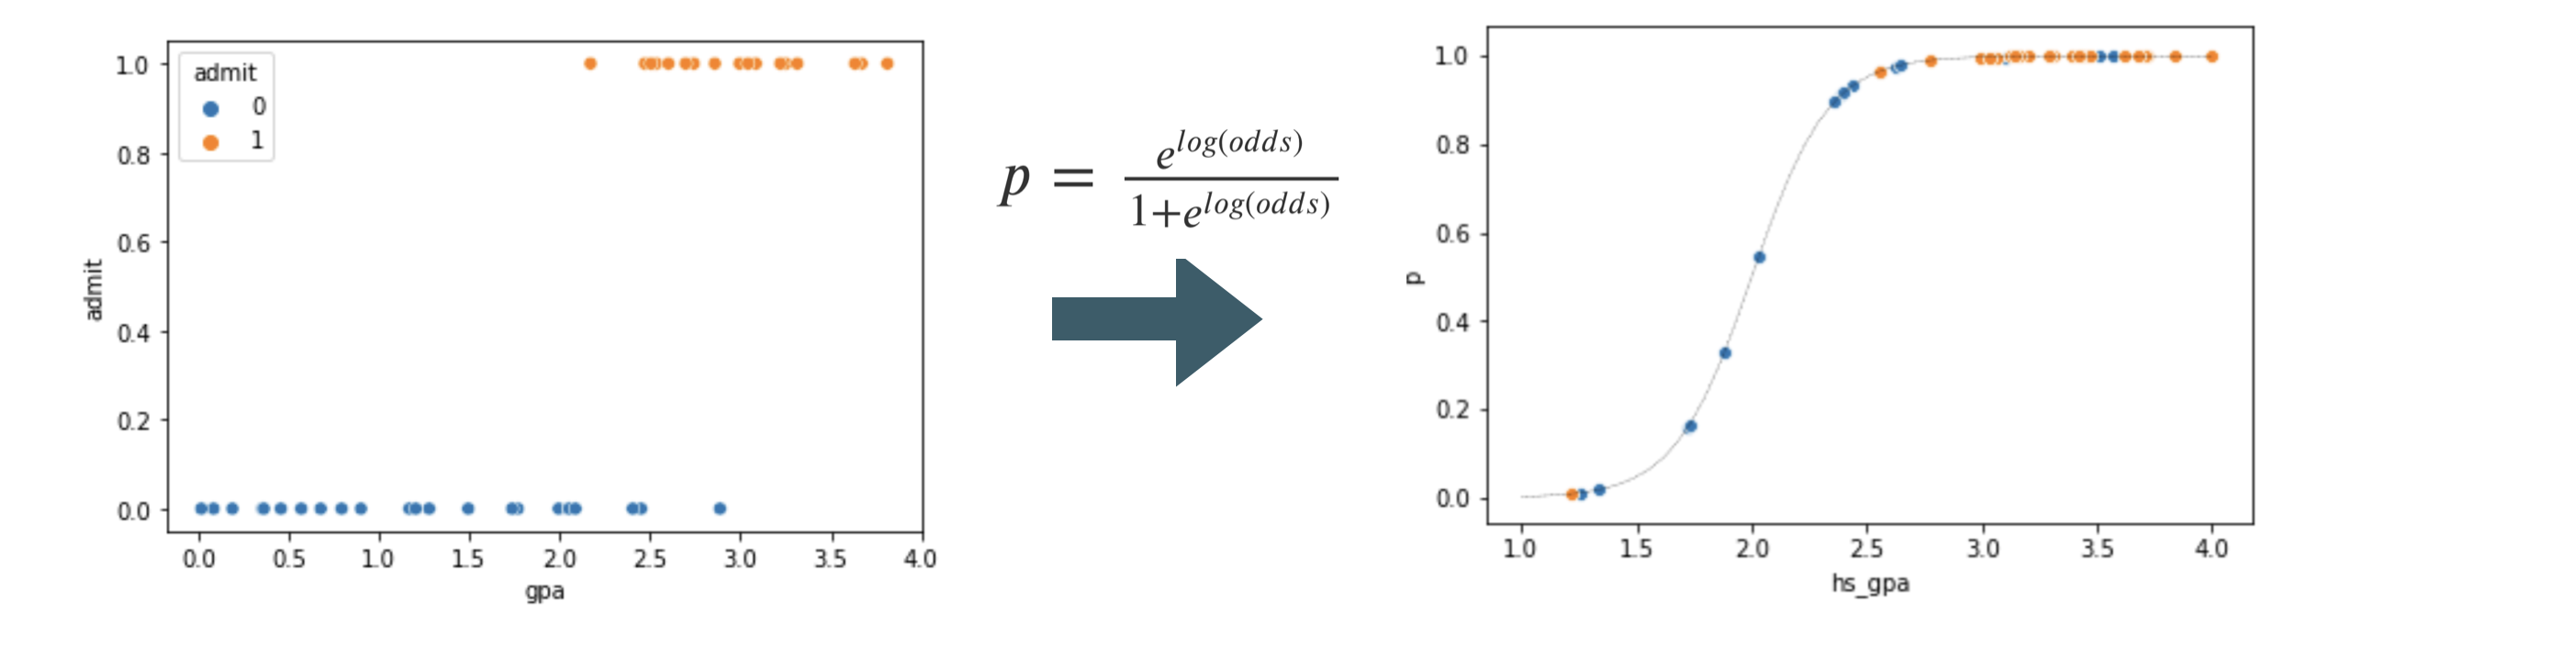

### Examples of logistic regression models

1. Probability of defaulting on bank loan given demographic characteristics

In [9]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.generalized_linear_model import families
from patsy import dmatrices
from statsmodels.discrete.discrete_model import MNLogit


In [10]:
# import data downloaded from https://github.com/mvlasceanu/RegressionData/blob/main/creditdefault.xls
# df = pd.read_excel('creditdefault.xls')

# Or you can read the Excel file directly from the URL
url = 'https://github.com/mvlasceanu/RegressionData/raw/main/creditdefault.xls'
df = pd.read_excel(url)

df

ID  DEFAULT  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1        1    2          2         1   24      2      2     -1   
1          2        1    2          2         2   26     -1      2      0   
2          3        0    2          2         2   34      0      0      0   
3          4        0    2          2         1   37      0      0      0   
4          5        0    1          2         1   57     -1      0     -1   
...      ...      ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996        0    1          3         1   39      0      0      0   
29996  29997        0    1          3         2   43     -1     -1     -1   
29997  29998        1    1          2         2   37      4      3      2   
29998  29999        1    1          3         1   41      1     -1      0   
29999  30000        1    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0         -1  ...        689          0          0          0         0   
1          0  ...       2682       3272       3455       3261         0   
2          0  ...      13559      14331      14948      15549      1518   
3          0  ...      49291      28314      28959      29547      2000   
4          0  ...      35835      20940      19146      19131      2000   
...      ...  ...        ...        ...        ...        ...       ...   
29995      0  ...     208365      88004      31237      15980      8500   
29996     -1  ...       3502       8979       5190          0      1837   
29997     -1  ...       2758      20878      20582      19357         0   
29998      0  ...      76304      52774      11855      48944     85900   
29999      0  ...      49764      36535      32428      15313      2078   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0           689         0         0         0         0  
1          1000      1000      1000         0      2000  
2          1500      1000      1000      1000      5000  
3          2019      1200      1100      1069      1000  
4         36681     10000      9000       689       679  
...         ...       ...       ...       ...       ...  
29995     20000      5003      3047      5000      1000  
29996      3526      8998       129         0         0  
29997         0     22000      4200      2000      3100  
29998      3409      1178      1926     52964      1804  
29999      1800      1430      1000      1000      1000  

[30000 rows x 24 columns]

In [11]:
# Run a logistic regression predicting DEFAULT (binary variable) as a function of people's education
# one option is to use statsmodels' glm function, and specify the dv is binomial:

Model = smf.glm("DEFAULT ~ EDUCATION", family=sm.families.Binomial(), data=df).fit()
print(Model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                DEFAULT   No. Observations:                30000
Model:                            GLM   Df Residuals:                    29998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15841.
Date:                Tue, 16 Jan 2024   Deviance:                       31682.
Time:                        15:09:04   Pearson chi2:                 3.00e+04
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0007751
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4155      0.035    -39.939      0.0

In [12]:
# another way of running the analysis above is directly using statsmodels' logit function
# note that the outputs are very similar

Model = smf.logit("DEFAULT ~ EDUCATION", data=df).fit()
print(Model.summary())

Optimization terminated successfully.
         Current function value: 0.528035
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29998
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:               0.0007337
Time:                        15:09:04   Log-Likelihood:                -15841.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                 1.414e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4155      0.035    -39.939      0.000      -1.485      -1.346
EDUCATION      0.0839      0.

In [13]:
# another way of running the analysis above is directly using statsmodels' logit function
# note that the outputs are very similar

Model = smf.logit("DEFAULT ~ C(EDUCATION)", data=df).fit()
print(Model.summary())

         Current function value: 0.525344
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29993
Method:                           MLE   Df Model:                            6
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                0.005826
Time:                        15:09:04   Log-Likelihood:                -15760.
converged:                      False   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                 3.392e-37
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -20.7490   8561.107     -0.002      0.998   -1.68e+04    1.68e+04
C(EDUCATION)[T.1]    19.3142   8561.107     

/Users/madalina/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Because $$y \sim \text{Bernoulli}(p)$$

$$\log\left(\frac{p}{1-p}\right) = \beta_0+\beta_1 x$$

$$ p = \frac{1}{1+\exp(-(\beta_0+\beta_1 x))} $$

And the intercept is the value at which X=0, which means that to get the probability of default (y=1) we need to replace x with 0 in the equation above, and $\beta_0$ with the value of the intercept from the output (in this case $\beta_0$=-1.4155):

In [14]:
1/(1+ np.exp(-(-1.4155)))

0.1953680110786012

Therefore, the probability of default in this example is 19%.

Now let's see what happens as education increases: a 1 unit increase in education (so when x=1), the probability of default is now calculated by replacing $\beta_0$ with -1.4155 and $\beta_1$ with 0.0839

In [15]:
1/(1+ np.exp(-(-1.4155 + 0.0839)))

0.20889482960957137

So when X=1 the probability of default is 20%.

Interpreting fit quality:
- Look at the pseudo-R2 a measure of the proportional log odds improvement of the fitted logistic regression compared to a model which only includes an intercept but no slope.
- The values vary from 0 (when the model does not improve the likelihood) to 1 (where the model fits perfectly and the log-likelihood is maximized at 0). Consquently, higher values indicate a better fit.


Interpreting coefficients:
- The logistic regression coefficient β associated with a predictor X is the expected change in log odds of having the outcome per unit change in X. So increasing the predictor by 1 unit (or going from 1 level to the next) multiplies the odds of having the outcome by e to the power β
- So a unit increase in some areas of the input space might result in a larger increase than a increase in a region closer to 0 or 1.
- The rate of change is highest near the inflection or turning point (which is near the mean of the output data) because that is the part that has the highest tangent (i.e., first derivative).

In [16]:
# include multiple predictors

Model = smf.logit("DEFAULT ~ EDUCATION + AGE + MARRIAGE + SEX", data=df).fit()
print(Model.summary())

Optimization terminated successfully.
         Current function value: 0.526979
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29995
Method:                           MLE   Df Model:                            4
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                0.002731
Time:                        15:09:04   Log-Likelihood:                -15809.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                 6.938e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8727      0.108     -8.045      0.000      -1.085      -0.660
EDUCATION      0.0780      0.

In [17]:
# look for interactions:
# example: do unmarried men default more than unmarried women (when controlling for eduacation and age)?

Model = smf.logit("DEFAULT ~ EDUCATION + AGE + MARRIAGE*SEX", data=df).fit()
print(Model.summary())

Optimization terminated successfully.
         Current function value: 0.526967
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29994
Method:                           MLE   Df Model:                            5
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                0.002754
Time:                        15:09:04   Log-Likelihood:                -15809.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                 2.473e-17
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7590      0.173     -4.375      0.000      -1.099      -0.419
EDUCATION        0.0788

### Logistic regression Example 2

Also predicting default but now using credit balance

In [18]:
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)
data

default  student      balance        income
0           0        0   729.526495  44361.625074
1           0        1   817.180407  12106.134700
2           0        0  1073.549164  31767.138947
3           0        0   529.250605  35704.493935
4           0        0   785.655883  38463.495879
...       ...      ...          ...           ...
9995        0        0   711.555020  52992.378914
9996        0        0   757.962918  19660.721768
9997        0        0   845.411989  58636.156984
9998        0        0  1569.009053  36669.112365
9999        0        1   200.922183  16862.952321

[10000 rows x 4 columns]

In [19]:
data.student.unique()

array([0, 1])

In [20]:
# Run a logistic regression predicting DEFAULT (binary variable) as a function of people's credit balance
# one option is to use statsmodels' glm function, and specify the dv is binomial:

Model = smf.glm("default ~ student", family=sm.families.Binomial(), data=data).fit()
print(Model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1454.3
Date:                Tue, 16 Jan 2024   Deviance:                       2908.7
Time:                        15:09:05   Pearson chi2:                 1.00e+04
No. Iterations:                     6   Pseudo R-squ. (CS):           0.001196
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5041      0.071    -49.554      0.0

In [21]:
# Run a logistic regression predicting DEFAULT (binary variable) as a function of people's credit balance
# one option is to use statsmodels' glm function, and specify the dv is binomial:

Model = smf.glm("default ~ C(student)", family=sm.families.Binomial(), data=data).fit()
print(Model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1454.3
Date:                Tue, 16 Jan 2024   Deviance:                       2908.7
Time:                        15:09:05   Pearson chi2:                 1.00e+04
No. Iterations:                     6   Pseudo R-squ. (CS):           0.001196
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.5041      0.071    -

<Axes: xlabel='balance', ylabel='default'>

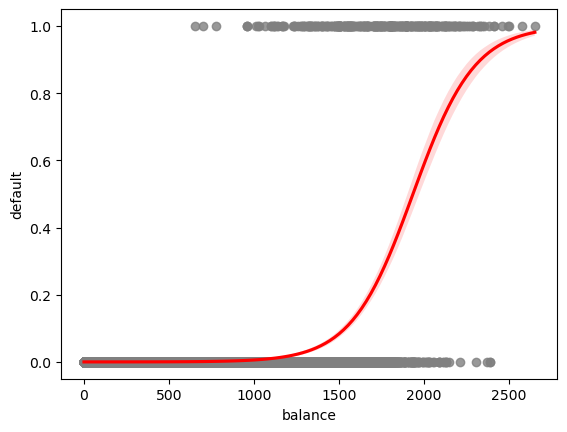

In [22]:
#plot logistic regression curve
sns.regplot(x=data.balance, y=data.default, data=data, color='red', scatter_kws={'color': 'gray'}, logistic=True)

In [23]:
# Run a logistic regression predicting DEFAULT (binary variable) as a function of people's credit balance
# one option is to use statsmodels' glm function, and specify the dv is binomial:

Model = smf.glm("default ~ balance", family=sm.families.Binomial(), data=data).fit()
print(Model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -798.23
Date:                Tue, 16 Jan 2024   Deviance:                       1596.5
Time:                        15:09:18   Pearson chi2:                 7.15e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1240
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.0

## 2. Multinomial Regression

When the DV has more than 2 options, use a multinomial logistic regression (MNLogit).

Examples:
- yes, no, maybe
- Democratic, Republican, Independent

Multinomial logistic regression is also called multiclass logistic regression, or softmax regression




$$y \sim \text{Multinomial}(\mathbf{p})$$

$$\mathbf{p} = \left[\frac{e^{f_1}}{\sum_i e^{f_i}},...,\frac{e^{f_K}}{\sum_i e^{f_i}}\right]$$

$$ \mathbf{f}=\boldsymbol{\beta}_0 + \boldsymbol{\beta}_1x $$

$$\boldsymbol{\beta}_0 = [\beta_{0,1}, ... \beta_{0,K-1}, 0], \boldsymbol{\beta}_1 = [\beta_{1,1}, ... \beta_{1,K-1}, 0]$$

In [24]:
# import data downloaded from https://github.com/mvlasceanu/RegressionData/blob/main/data.xlsx
# df2 = pd.read_excel('data.xlsx')

# Or you can read the Excel file directly from the URL
url = 'https://github.com/mvlasceanu/RegressionData/raw/main/data.xlsx'
df2 = pd.read_excel(url)

df2.head()

Response ID  GENDER  AGE  PARTY  TWITTER  TRUST   RU1  RU2  RU3  RU4  \
0  R_0cj5dsJg2wfpiuJ       1   18      1        0     95   4.0   26    0   -5   
1  R_0rkhLjwWPHHjnTX       0   19      2        1     76  -5.0   16    3   -1   
2  R_10BMNpjhInMfUeO       1   18      1        1     86  -5.0   -2    5    5   
3  R_120iGR6WlLnbZnI       0   22      1        0     95  23.0  -10  -40   22   
4  R_12qW8cDY0bNlId2       0   19      3        0     76  18.0  -12    1   16   

   ...  Post23  Post24  Post25  Post26  Post27  Post28  Post29  Post30  \
0  ...      69      60      20      58      84      22      42      77   
1  ...      58      82      38      61      36      40      62      68   
2  ...      35      46      39      65      44      42      53      55   
3  ...      14      76      20      61      87      82      63      19   
4  ...      17      81      31      83      82      76      43      33   

   Post31  Post32  
0      90      71  
1      46      43  
2      45      35  
3      97      37  
4      82      47  

[5 rows x 102 columns]

In [25]:
# What is the probability some is a Democrat (PARTY==1), or a Republican (PARTY==2), or an Independent (PARTY==3)?

expr = "PARTY ~ TRUST" # first specify the equation as Outcome ~ Predictor
y, x = dmatrices(expr, df2, return_type='dataframe') # then using the equation create a design matrix
Model = sm.MNLogit(y, x).fit() # then fit the multinomial regression model
print(Model.summary()) # print the summary

Optimization terminated successfully.
         Current function value: 0.837480
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                  PARTY   No. Observations:                  200
Model:                        MNLogit   Df Residuals:                      196
Method:                           MLE   Df Model:                            2
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                 0.04317
Time:                        15:09:19   Log-Likelihood:                -167.50
converged:                       True   LL-Null:                       -175.05
Covariance Type:            nonrobust   LLR p-value:                 0.0005229
   PARTY=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0955      1.513      2.046      0.041       0.130       6.061
TRUST         -0.0579      0.

In [26]:
# output interpretation
# when trust in science goes up, the probability of being in Party==2 goes down because the coefficient of "TRUST" is negative
# when trust in science goes up, the probability of being in Party==3 also goes down because the coefficient of "TRUST" is negative

# when trust in science goes up, the probability of being in Party==1 has to go up because the other 2 go down and the 3 of them have to always sum to 1.

In [27]:
# For zero trust in science, what is the probability of being [Democrat, Republican, Independent]?
# Plug in the intercepts for each category in the formula below
# note the intercept for the base category (in this case "Democrats" as they are alphabetically first) is always 0

_sum = np.exp(0)+np.exp(3.0955)+np.exp(2.7394)
[np.exp(0)/_sum, np.exp(3.0955)/_sum, np.exp(2.7394)/_sum]

[0.025922866617322432, 0.572850892405553, 0.4012262409771245]

In [28]:
# For X trust in science, what is the probability of being [Democrat, Republican, Independent]?
# First, choose a level of the IV (here, trust in science)
# then plug in the intercept and slope from the regression output in the formula below

trust = 80 # This value plugs in below

_sum = np.exp(0)+np.exp(3.0955-0.0579*trust)+np.exp(2.7394-0.0423*trust)
[np.exp(0)/_sum, np.exp(3.0955-0.0579*trust)/_sum, np.exp(2.7394-0.0423*trust)/_sum]

[0.5747109264810433, 0.12363914201115143, 0.3016499315078052]

## 3. Poisson Regression

- Poisson Regression is another generalized linear model.
- It is also called a log-linear model.
- Poisson Regression is used when the DV has a Poisson distribution (e.g., count data)
- Poisson regression models are generalized linear models with the logarithm as the (canonical) link function, and the Poisson distribution function as the assumed probability distribution of the response.
- Negative binomial regression is a popular generalization of Poisson regression (used when variance of count data is very large).
- The traditional negative binomial regression model is based on the Poisson-gamma mixture distribution.

A Formal Specification of the Poisson Regression Model:
For the ith observation in the data set denoted by $y_i$ corresponding to the row of regression variables x_i, the probability of observing the count y_i is Poisson distributed as per the following PMF, where the mean rate λ_i for the ith sample is given by the exponential link function

$$y \sim \text{Poisson}(\lambda)$$

$$\log(\lambda) = \beta_0+\beta_1 x$$

$$\lambda = e^{\beta_0+\beta_1 x}= e^{\beta_0}e^{\beta_1 x}$$

### Example of Poisson regression

What predicts how many bikes cross the Brooklyn Bridge in a given day

In [29]:
# import data downloaded from https://github.com/mvlasceanu/RegressionData/blob/main/bike.xlsx
# data source: NYC Open Data: Bicycle Counts for East River Bridges Raw
# df = pd.read_excel('bike.xlsx')

# Or you can read the Excel file directly from the URL
url = 'https://github.com/mvlasceanu/RegressionData/raw/main/bike.xlsx'
df = pd.read_excel(url)

df

Date  HIGH_T  LOW_T  PRECIP  BB_COUNT
0   2017-04-01    46.0   37.0    0.00       606
1   2017-04-02    62.1   41.0    0.00      2021
2   2017-04-03    63.0   50.0    0.03      2470
3   2017-04-04    51.1   46.0    1.18       723
4   2017-04-05    63.0   46.0    0.00      2807
..         ...     ...    ...     ...       ...
209 2017-10-27    62.1   48.0    0.00      3150
210 2017-10-28    68.0   55.9    0.00      2245
211 2017-10-29    64.9   61.0    3.03       183
212 2017-10-30    55.0   46.0    0.25      1428
213 2017-10-31    54.0   44.0    0.00      2727

[214 rows x 5 columns]

In [30]:
# Test whether fewer people bike on the Brooklyn Bridge on rainy days

expr = "BB_COUNT ~ PRECIP"
y, x = dmatrices(expr, df, return_type='dataframe')
Model = sm.GLM(y, x, family=sm.families.Poisson()).fit()
print(Model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  214
Model:                            GLM   Df Residuals:                      212
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21245.
Date:                Tue, 16 Jan 2024   Deviance:                       40425.
Time:                        15:09:19   Pearson chi2:                 3.84e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9751      0.001   5769.063      0.0

In [31]:
# calculate e to the power of the intercept coefficient
# this number is the average number of bikes on the bridge when X=0 (precipitation = 0, so not raining)
np.exp(7.97)

2892.857364220396

This means, when it's not raining, the average number of bikes on the bridge is 2892.

In [32]:
# calculate e to the power of the coefficient (in this example the coefficient is -0.92)
# this number is used in interpreting the relationship between the IV and DV

np.exp(-0.92)

0.39851904108451414

Interpretation:
- The Poisson regression coefficient β associated with a predictor X is the expected change, on the log scale, in the outcome Y per unit change in X. So holding all other variables in the model constant, increasing X by 1 unit (or going from 1 level to the next) multiplies the rate of Y by e to the power β
- in our example, a one unit increase in precipitation is associated with (e to the power -0.92, which equals 0.39) 0.39 times fewer bikes on Brooklyn Bridge. I said fewer because the coefficient is negative in this example.

In [33]:
# if you want to think about it in terms of percent change, calculate the percent change using the formula:
# percent change = (new-old)/old
# in our case new = exp(beta0)*exp(beta1)
# and old = exp(beta0)
# therefore, percent change of bikes associated with a unit increase in percipitation is:
# (exp(beta0)*exp(beta1) - exp(beta0)) / exp(beta0) = exp(beta1) - 1

np.exp(-0.92) - 1

-0.6014809589154859

Thus, raining is associated with a 60% decrease in biking on Brooklyn Bridge.

## 4. Ordinal Regression



Ordinal regression is used when the outcome variable (DV) is ordinal.

Examples:
- likert measures:
      - Strongly Disagree – Slightly Disagree – Slighty Agree – Strongly Agree
      - Unlikely – Somewhat likely – Likely

Ordinal regression is also called ranking learning or ordinal classification.
Here, we will run an ordered logit as an example.

$$\Pr(y\le k) \sim \text{Bernoulli}(p)$$

$$ p = \frac{1}{1+e^{-(\theta_k - \beta_1 x)}} $$

Note the **minus** $\beta_1 x$ as well as the **threshold** $\theta_k$ for the outcome option $k$ (also called levels). This is a cumulative probability that a datapoint is below the k-th level, so the probability that a datapoint is _in_ the k-th level is

$$\Pr(y= k) = \Pr(y\le k) - \Pr(y\le k-1)$$

In [34]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [35]:
# get data
# This dataset is about the probability for undergraduate students to apply to graduate school given three exogenous variables:
# 1. "gpa" which means grade point average in college
# 2. "pared" which indicates if at least one parent went to graduate school
# 3. "public" which indicates if the current undergraduate institution of the student is public or private

url = "https://stats.idre.ucla.edu/stat/data/ologit.dta"
data_student = pd.read_stata(url)
data_student

apply  pared  public   gpa
0        very likely      0       0  3.26
1    somewhat likely      1       0  3.21
2           unlikely      1       1  3.94
3    somewhat likely      0       0  2.81
4    somewhat likely      0       0  2.53
..               ...    ...     ...   ...
395         unlikely      0       0  3.70
396         unlikely      0       0  2.63
397  somewhat likely      0       0  2.25
398  somewhat likely      0       0  3.26
399      very likely      0       0  3.52

[400 rows x 4 columns]

<Axes: >

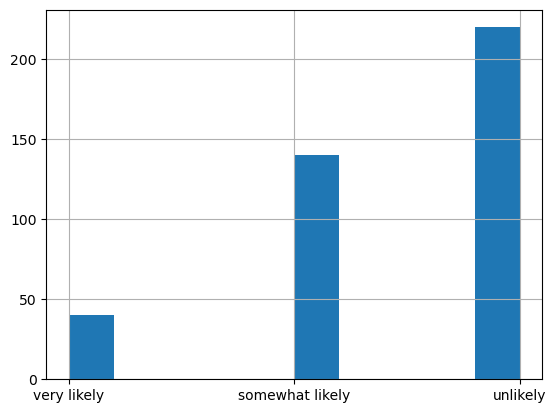

In [36]:
data_student['apply'].hist()

In [37]:
# Run the model using 'gpa' to predict probability of 'apply'

model = OrderedModel(data_student['apply'], data_student['gpa'], distr='logit') # give the DV, then the IV
result = model.fit(method='bfgs', disp=False)
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:                  apply   Log-Likelihood:                -366.30
Model:                   OrderedModel   AIC:                             738.6
Method:            Maximum Likelihood   BIC:                             750.6
Date:                Tue, 16 Jan 2024                                         
Time:                        15:09:20                                         
No. Observations:                 400                                         
Df Residuals:                     397                                         
Df Model:                           1                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
gpa                             0.7249      0.249      2.908      0.004       0.236       1.213
u

In [38]:
# Output interpretation:
# As GPA increases, the expected level of the outcome variable significantly increases (p=0.004).

In [39]:
# The unlikely/somewhat likely and somewhat likely/very likely are not the class thresholds directly;
# postprocess those with provided functions:
number_of_levels = 3
model.transform_threshold_params(result.params[-(number_of_levels-1):])

array([      -inf, 2.37485065, 4.39990038,        inf])

In [40]:
# Probabilities of [unlikely, somewhat likely, very likely] to apply to grad school:
gpa = 4.0

# Probability of "unlikely to apply to grad school"
prob = [1/(1+np.exp(-(2.3749 - 0.7249*gpa)))]
# Probability of "somewhat likely to apply to grad school" = Probability of "at most somewhat likely to apply to grad school" MINUS "unlikely"
prob.append(1/(1+np.exp(-(4.39990038 - 0.7249*gpa))) - sum(prob))
# Probability of "very likely to apply to grad school" = 1 MINUS ("unlikely" + "somewhat likely")
prob.append(1 - sum(prob))
# We subtract `sum(prob)` from each subsequent item because of the _cumulative probabilities_ defined above.

prob

[0.3717538748879268, 0.445865397643395, 0.18238072746867817]

In [41]:
# get model predictions for dataset
pred = result.model.predict(result.params)
preddf = pd.concat((data_student[["gpa"]], pd.DataFrame(pred, columns=["Unlikely", "SomewhatLikely", "VeryLikely"])), axis="columns")

#transform the datafram from wide format to long format using Panda's melt function
preddf2 = pd.melt(
    preddf.loc[:, ["Unlikely", "SomewhatLikely", "VeryLikely", "gpa"]],
    id_vars=["gpa"],
    var_name="Outcome",
    value_name="Likelihood"
)
preddf2

gpa     Outcome  Likelihood
0     3.26    Unlikely    0.502943
1     3.21    Unlikely    0.512002
2     3.94    Unlikely    0.381983
3     2.81    Unlikely    0.583696
4     2.53    Unlikely    0.632028
...    ...         ...         ...
1195  3.70  VeryLikely    0.152144
1196  2.63  VeryLikely    0.076316
1197  2.25  VeryLikely    0.059026
1198  3.26  VeryLikely    0.115391
1199  3.52  VeryLikely    0.136066

[1200 rows x 3 columns]

<Axes: xlabel='gpa', ylabel='Likelihood'>

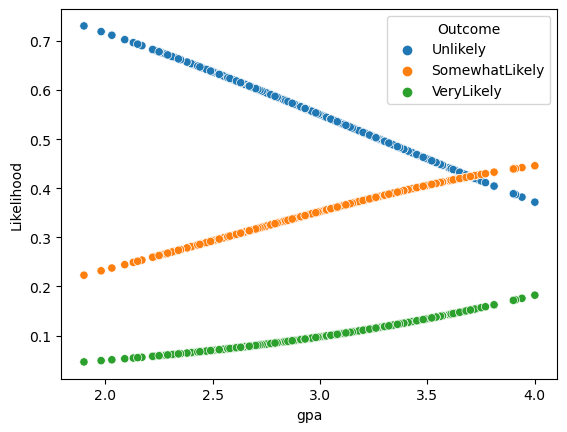

In [42]:
sns.scatterplot(data=preddf2, x="gpa", y="Likelihood", hue="Outcome")